<a href="https://colab.research.google.com/github/limonheiro/GAN_Classificador/blob/main/class_alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f2eac069-d2a7-d5c5-34af-446a1f48a4d6)


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import  image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Softmax
from tensorflow.keras.models import Sequential

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

batch_size=16

# Carregando as imagens

In [3]:
#https://www.kaggle.com/code/theyazilimci/alzheimer-prediction-92-acc/notebook
#https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset

!wget  "https://github.com/limonheiro/GAN_Classificador/raw/main/alzheimer.zip"

--2022-04-24 22:54:13--  https://github.com/limonheiro/GAN_Classificador/raw/main/alzheimer.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/limonheiro/GAN_Classificador/main/alzheimer.zip [following]
--2022-04-24 22:54:13--  https://raw.githubusercontent.com/limonheiro/GAN_Classificador/main/alzheimer.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29365000 (28M) [application/zip]
Saving to: ‘alzheimer.zip’

alzheimer.zip       100%[===================>]  28.00M  99.1MB/s    in 0.3s    

2022-04-24 22:54:14 (99.1 MB/s) - ‘alzheimer.zip’ saved [29365000/29365000]



In [4]:
!unzip -q "alzheimer.zip"

In [5]:
DEFAULT_PATH = "/content/Dataset"

In [6]:
from os import listdir
from os.path import join, isdir
class_name = np.array([f for f in listdir(DEFAULT_PATH) if isdir(join(DEFAULT_PATH, f))])
n_classes = len(class_name)

In [7]:
img_height=img_width=128

In [8]:
train_data = image_dataset_from_directory(
                  DEFAULT_PATH,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  color_mode='rgb',
                  interpolation="nearest",
                  follow_links=False,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(DEFAULT_PATH,
                                        validation_split=0.2,
                                        subset="validation", 
                                        seed=123,
                                        color_mode="rgb",
                                        interpolation="nearest",
                                        follow_links=False,
                                        image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [9]:
# def process(image,label):
#     image = tf.cast(tf.cast(image, tf.float32)/255.0 ,tf.float32)
#     return image,label

# train_data = train_data.map(process)
# val_data = val_data.map(process)

In [10]:
from tensorflow.keras.applications.efficientnet import EfficientNetB1, preprocess_input
 
backbone = EfficientNetB1(include_top = False,
                          input_shape = (128, 128, 3),
                          pooling = 'avg')

27033600/27018416 [==============================] - 0s 0us/step


In [11]:
dense_count = 32
 
model = Sequential()
model.add(backbone)
 
model.add(Dense(dense_count))
model.add(LeakyReLU())
model.add(BatchNormalization())
 
model.add(Dense(n_classes))
model.add(Softmax())

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [13]:
epochs = 200
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/200
320/320 [==============================] - 57s 106ms/step - loss: 1.0304 - accuracy: 0.5971 - val_loss: 0.8867 - val_accuracy: 0.6336
Epoch 2/200
320/320 [==============================] - 31s 98ms/step - loss: 0.5962 - accuracy: 0.7709 - val_loss: 0.7762 - val_accuracy: 0.7547
Epoch 3/200
320/320 [==============================] - 32s 98ms/step - loss: 0.3752 - accuracy: 0.8625 - val_loss: 0.3069 - val_accuracy: 0.8813
Epoch 4/200
320/320 [==============================] - 32s 98ms/step - loss: 0.2539 - accuracy: 0.9100 - val_loss: 0.2774 - val_accuracy: 0.8883
Epoch 5/200
320/320 [==============================] - 32s 98ms/step - loss: 0.1599 - accuracy: 0.9471 - val_loss: 0.2463 - val_accuracy: 0.9219
Epoch 6/200
320/320 [==============================] - 32s 98ms/step - loss: 0.1570 - accuracy: 0.9465 - val_loss: 0.5085 - val_accuracy: 0.8508
Epoch 7/200
320/320 [==============================] - 32s 99ms/step - loss: 0.1265 - accuracy: 0.9576 - val_loss: 0.2779 - val_a

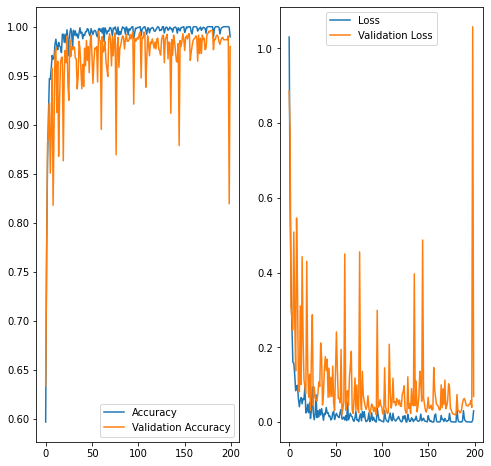

In [14]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
model.save('/content/drive/MyDrive/classificador/class_alzheimer')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/classificador/class_alzheimer/assets
